In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Loading MNIST dataset using keras

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

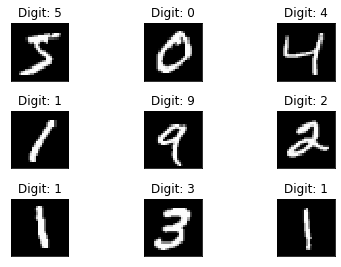

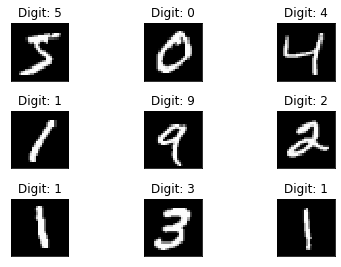

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

Applying data augmentation - random image rotation

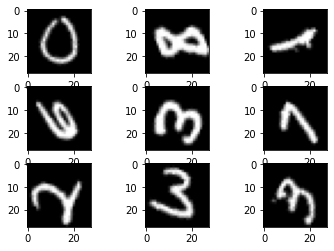

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

x_train_aug = x_train.reshape((x_train.shape[0], 28, 28, 1))
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(x_train_aug)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train_aug, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [ ]:
def rotate_image(x, y):
  from keras.preprocessing.image import ImageDataGenerator
  x = x.reshape((x.shape[0], 28, 28, 1))
  datagen = ImageDataGenerator(rotation_range=90)
  datagen.fit(x)

  for x_aug, y_aug in datagen.flow(x, y, batch_size=10000):
    return x_aug, y_aug

In [ ]:
x_train_aug, y_train_aug = rotate_image(x_train, y_train)
x_test_aug, y_test_aug = rotate_image(x_test, y_test)

In [ ]:
x_train = x_train.reshape(60000, 784)
x_train_aug = x_train_aug.reshape(10000, 784)
x_test_aug = x_test_aug.reshape(10000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test_aug = x_test_aug.astype('float32')
x_test = x_test.astype('float32')

x_test = x_test / 255
x_train_aug = x_train_aug / 255
x_test_aug = x_test_aug / 255
x_test = x_test / 255


In [ ]:
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

y_train_aug = np_utils.to_categorical(y_train_aug, n_classes)
y_test_aug = np_utils.to_categorical(y_test_aug, n_classes)

print(y_train.shape)
print(y_test.shape)
print(y_train_aug.shape)
print(y_test_aug.shape)

(60000, 10)
(10000, 10)
(10000, 10)
(10000, 10)


Creating DNN and training using keras

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

Epoch 1/20
118/118 - 3s - loss: 1.0071 - acc: 0.8025 - val_loss: 3.0263 - val_acc: 0.1135
Epoch 2/20
118/118 - 3s - loss: 0.3370 - acc: 0.9104 - val_loss: 2.9512 - val_acc: 0.1135
Epoch 3/20
118/118 - 3s - loss: 0.2716 - acc: 0.9252 - val_loss: 2.9062 - val_acc: 0.1135
Epoch 4/20
118/118 - 3s - loss: 0.2465 - acc: 0.9336 - val_loss: 2.8802 - val_acc: 0.1135
Epoch 5/20
118/118 - 3s - loss: 0.2235 - acc: 0.9388 - val_loss: 2.8455 - val_acc: 0.1135
Epoch 6/20
118/118 - 3s - loss: 0.2001 - acc: 0.9427 - val_loss: 2.8310 - val_acc: 0.1135
Epoch 7/20
118/118 - 3s - loss: 0.1887 - acc: 0.9457 - val_loss: 2.8198 - val_acc: 0.1135
Epoch 8/20
118/118 - 3s - loss: 0.1757 - acc: 0.9505 - val_loss: 2.8016 - val_acc: 0.1135
Epoch 9/20
118/118 - 3s - loss: 0.1684 - acc: 0.9521 - val_loss: 2.7725 - val_acc: 0.1135
Epoch 10/20
118/118 - 3s - loss: 0.1608 - acc: 0.9536 - val_loss: 2.7569 - val_acc: 0.1135
Epoch 11/20
118/118 - 3s - loss: 0.1524 - acc: 0.9549 - val_loss: 2.7357 - val_acc: 0.1135
Epoch 12

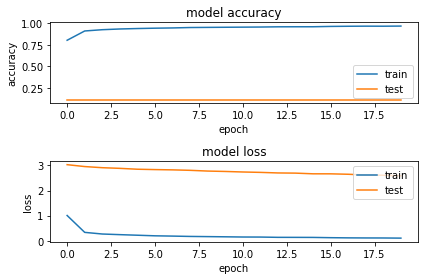

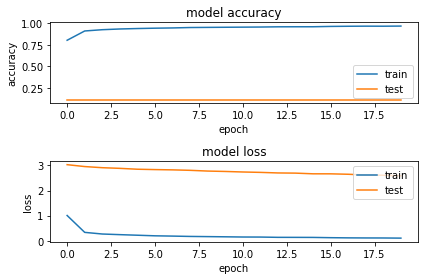

In [ ]:
#training the model and saving metrics in history
history = model.fit(x_train, y_train,
          batch_size=512, epochs=20,
          verbose=2,
          validation_data=(x_test, y_test))


# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

Epoch 1/20
20/20 - 1s - loss: 1.6964 - acc: 0.4686 - val_loss: 1.4237 - val_acc: 0.6173
Epoch 2/20
20/20 - 1s - loss: 1.3564 - acc: 0.6102 - val_loss: 1.1238 - val_acc: 0.7089
Epoch 3/20
20/20 - 1s - loss: 1.1344 - acc: 0.6679 - val_loss: 0.9300 - val_acc: 0.7510
Epoch 4/20
20/20 - 1s - loss: 0.9870 - acc: 0.7019 - val_loss: 0.8085 - val_acc: 0.7798
Epoch 5/20
20/20 - 1s - loss: 0.8974 - acc: 0.7212 - val_loss: 0.7294 - val_acc: 0.8033
Epoch 6/20
20/20 - 1s - loss: 0.8267 - acc: 0.7453 - val_loss: 0.6733 - val_acc: 0.8143
Epoch 7/20
20/20 - 1s - loss: 0.7728 - acc: 0.7674 - val_loss: 0.6347 - val_acc: 0.8208
Epoch 8/20
20/20 - 1s - loss: 0.7253 - acc: 0.7767 - val_loss: 0.5998 - val_acc: 0.8288
Epoch 9/20
20/20 - 1s - loss: 0.6865 - acc: 0.7892 - val_loss: 0.5702 - val_acc: 0.8363
Epoch 10/20
20/20 - 1s - loss: 0.6547 - acc: 0.7995 - val_loss: 0.5455 - val_acc: 0.8431
Epoch 11/20
20/20 - 1s - loss: 0.6172 - acc: 0.8123 - val_loss: 0.5224 - val_acc: 0.8466
Epoch 12/20
20/20 - 1s - loss:

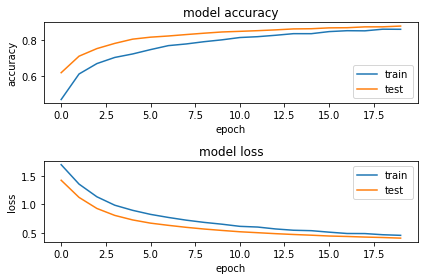

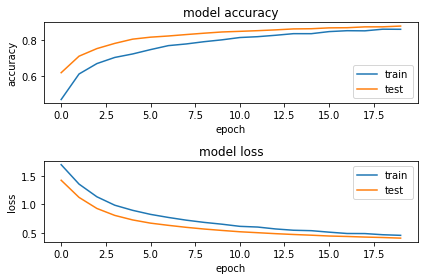

In [ ]:
#training the model and saving metrics in history

history = model.fit(x_train_aug, y_train_aug,
            batch_size=512, epochs=20,
            verbose=2,
            validation_data=(x_test_aug, y_test_aug))

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig